In [2]:
from imports import *
import wrangle as wr
df = pd.read_csv('Hotel_Reviews.csv')
df = wr.wrangle_hotel(use_cache=True)



df.info()
df.head()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Using cached csv file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   hotel_name                                  515738 non-null  object 
 3   reviewer_nationality                        515738 non-null  object 
 4   negative_review                             387848 non-null  object 
 5   review_total_negative_word_counts           515738 non-null  int64  
 6   total_number_of_reviews                     515738 non-null  int64  
 7   positive_review                             479792 non-null  object 
 8   review_total_positive_word_counts           515738 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  5

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,trip_type,nights_stayed,group_type,month,year,day_name,day,quarter,negative_unique_word_count,positive_unique_word_count,street,city,zip_code,country,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
0,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,7.5,730,51.519569,-0.170521,leisure,2.0,group,August,2015,Tuesday,4,3,39,6,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,hotel clean accessible,first day swimming pool opened therefore could...,hotel clean access,first day swim pool open therefor could access...,hotel clean accessible,first day swimming pool opened therefore could...,0.4019,-0.1027,0.4019,-0.1027
1,125,8.6,Hotel Mademoiselle,United Kingdom,NaN,0,853,very good location breakfast was great,7,10,8.3,730,48.877249,2.354304,leisure,2.0,group,August,2015,Tuesday,4,3,2,6,7 Rue des Petits H tels 10th,Paris,arr 75010,France,good location breakfast great,NaN,good locat breakfast great,NaN,good location breakfast great,NaN,0.7906,0.0000,0.7906,0.0000
2,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,10.0,730,48.205097,16.377093,unknown,3.0,family with young children,August,2015,Tuesday,4,3,1,6,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,nice excellent hotel,nothing,nice excel hotel,noth,nice excellent hotel,nothing,0.7579,0.0000,0.7579,0.0000
3,341,7.8,Novotel Amsterdam City,Austria,NaN,0,2501,Slightly out of the city center but very easy...,27,34,9.6,730,52.333803,4.888471,leisure,2.0,group,August,2015,Tuesday,4,3,2,23,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,slightly city center easy get tram train reall...,NaN,slightli citi center easi get tram train reall...,NaN,slightly city center easy get tram train reall...,NaN,0.9414,0.0000,0.9414,0.0000
4,843,7.8,Hilton London Kensington Hotel,Qatar,NaN,0,3801,Great easy to reAch location,6,5,7.5,730,51.505108,-0.213266,leisure,1.0,solo traveler,August,2015,Tuesday,4,3,2,5,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,great easy reach location,NaN,great easi reach locat,NaN,great easy reach location,NaN,0.7964,0.0000,0.7964,0.0000


In [3]:
# Make a copy of the df where city == 'Barcelona'
barza_df = df.copy()[df.city == 'Barcelona']
# Make a copy of the df where city == 'Milan'
milan_df = df.copy()[df.city == 'Milan']

In [4]:
# Check
barza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60149 entries, 20 to 515731
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   additional_number_of_scoring                60149 non-null  int64  
 1   average_score                               60149 non-null  float64
 2   hotel_name                                  60149 non-null  object 
 3   reviewer_nationality                        60149 non-null  object 
 4   negative_review                             44183 non-null  object 
 5   review_total_negative_word_counts           60149 non-null  int64  
 6   total_number_of_reviews                     60149 non-null  int64  
 7   positive_review                             56583 non-null  object 
 8   review_total_positive_word_counts           60149 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  60149 non-null  int64  
 10  reviewer

In [5]:
milan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37207 entries, 16 to 515732
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   additional_number_of_scoring                37207 non-null  int64  
 1   average_score                               37207 non-null  float64
 2   hotel_name                                  37207 non-null  object 
 3   reviewer_nationality                        37207 non-null  object 
 4   negative_review                             27248 non-null  object 
 5   review_total_negative_word_counts           37207 non-null  int64  
 6   total_number_of_reviews                     37207 non-null  int64  
 7   positive_review                             34643 non-null  object 
 8   review_total_positive_word_counts           37207 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  37207 non-null  int64  
 10  reviewer

In [6]:
barza_df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,trip_type,nights_stayed,group_type,month,year,day_name,day,quarter,negative_unique_word_count,positive_unique_word_count,street,city,zip_code,country,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
20,215,8.5,Gran Hotel Torre Catalunya,Canada,I clearly requested before I booked online I ...,54,1671,Large rooms and bathrooms Great brunch,8,1,10.0,730,41.379557,2.142546,leisure,1.0,family with young children,August,2015,Tuesday,4,3,44,6,Avenida Roma 2 4 Sants Montju c,Barcelona,08014,Spain,large rooms bathrooms great brunch,clearly requested booked online required 1 roo...,larg room bathroom great brunch,clearli request book onlin requir 1 room 2 adu...,large room bathroom great brunch,clearly requested booked online required 1 roo...,0.6249,-0.5267,0.6249,-0.5267
23,42,9.4,Hotel Margot House,United Kingdom,Having to leave,5,335,Perfect location The staff were impeccable Th...,20,2,10.0,730,41.391880,2.166036,leisure,4.0,couple,August,2015,Tuesday,4,3,3,17,Paseo de Gracia 46 Eixample,Barcelona,08007,Spain,perfect location staff impeccable hotel like i...,leave,perfect locat staff impecc hotel like inner ci...,leav,perfect location staff impeccable hotel like i...,leave,0.8779,-0.0516,0.8779,-0.0516
57,23,8.4,Sansi Pedralbes,Ireland,Hard to control temp in room too cold for sle...,11,274,Friendly and enthuasiatic staff,5,1,8.8,730,41.393670,2.111542,unknown,3.0,couple,August,2015,Tuesday,4,3,10,4,Avenida Pearson 1 3 Les Corts,Barcelona,08034,Spain,friendly enthuasiatic staff,hard control temp room cold sleeping,friendli enthuasiat staff,hard control temp room cold sleep,friendly enthuasiatic staff,hard control temp room cold sleeping,0.4939,-0.1027,0.4939,-0.1027
152,163,8.7,Condes de Barcelona,Saudi Arabia,The fridge was closed and we asked them to op...,84,1319,Staff location style,4,1,6.3,730,41.393550,2.162710,leisure,2.0,couple,August,2015,Tuesday,4,3,60,3,Paseo de Gracia 73 Eixample,Barcelona,08008,Spain,staff location style,fridge closed asked open put water said buy th...,staff locat style,fridg close ask open put water said buy thing ...,staff location style,fridge closed asked open put water said buy th...,0.0000,0.8271,0.0000,0.8271
162,177,7.9,Exe Laietana Palace,Sweden,Small crack in the toilet seat that gave smal...,31,2045,Location was great Friendly staff and one gla...,15,11,8.5,730,41.383354,2.179404,leisure,5.0,couple,August,2015,Tuesday,4,3,27,13,Via Laietana 17 Ciutat Vella,Barcelona,08003,Spain,location great friendly staff one glas free ca...,small crack toilet seat gave small pinches tel...,locat great friendli staff one gla free cava a...,small crack toilet seat gave small pinch tell ...,location great friendly staff one glas free ca...,small crack toilet seat gave small pinch tell ...,0.8910,0.0000,0.8910,0.0000


In [7]:
milan_df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,trip_type,nights_stayed,group_type,month,year,day_name,day,quarter,negative_unique_word_count,positive_unique_word_count,street,city,zip_code,country,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
16,103,9.2,The Yard Milano,Jordan,NaN,0,786,Great style indeed a boutique hotel,7,39,10.0,730,45.453152,9.179172,leisure,4.0,couple,August,2015,Tuesday,4,3,2,6,Piazza XXIV Maggio 8 Milan City,Milan,Center 20123,Italy,great style indeed boutique hotel,NaN,great style inde boutiqu hotel,NaN,great style indeed boutique hotel,NaN,0.6249,0.000,0.6249,0.000
46,159,9.0,Ch teau Monfort Relais Ch teaux,Kuwait,Location,2,1053,Service,2,8,9.6,730,45.468236,9.207380,leisure,1.0,couple,August,2015,Tuesday,4,3,1,1,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,service,location,servic,locat,service,location,0.0000,0.000,0.0000,0.000
47,159,9.0,Ch teau Monfort Relais Ch teaux,Saudi Arabia,Bedsheets were stained with yellowish wet liq...,23,1053,Nice luxury hotel,4,2,8.3,730,45.468236,9.207380,leisure,1.0,couple,August,2015,Tuesday,4,3,22,3,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,nice luxury hotel,bedsheets stained yellowish wet liquid said cl...,nice luxuri hotel,bedsheet stain yellowish wet liquid said clean...,nice luxury hotel,bedsheets stained yellowish wet liquid said cl...,0.4215,0.296,0.4215,0.296
55,347,8.4,Hotel Michelangelo,United Kingdom,NaN,0,3510,Great location well run hotel with excellent ...,11,3,10.0,730,45.484514,9.205753,leisure,4.0,solo traveler,August,2015,Tuesday,4,3,2,9,Piazza Luigi di Savoia 6 Central,Milan,Station 20124,Italy,great location well run hotel excellent housek...,NaN,great locat well run hotel excel housekeep sta...,NaN,great location well run hotel excellent housek...,NaN,0.8720,0.000,0.8720,0.000
70,384,9.2,Hotel Berna,Denmark,The hotel is relatively expensive for what it...,11,4017,Very warm welcome by the staff great service ...,27,1,8.3,730,45.482669,9.203437,leisure,3.0,couple,August,2015,Tuesday,4,3,8,23,Via Napo Torriani 18 Central,Milan,Station 20124,Italy,warm welcome staff great service perfect locat...,hotel relatively expensive,warm welcom staff great servic perfect locat c...,hotel rel expens,warm welcome staff great service perfect locat...,hotel relatively expensive,0.9136,0.000,0.9136,0.000


In [8]:
barza_df.describe().T

,count,mean,std,min,25%,50%,75%,max
additional_number_of_scoring,60149.0,241.845268,141.155484,6.000000,129.000000,218.000000,334.000000,666.000000
average_score,60149.0,8.522812,0.476509,7.000000,8.200000,8.500000,8.800000,9.600000
review_total_negative_word_counts,60149.0,18.117043,29.399804,0.000000,0.000000,9.000000,23.000000,403.000000
total_number_of_reviews,60149.0,2311.024057,1401.640619,67.000000,1257.000000,1933.000000,3222.000000,6792.000000
review_total_positive_word_counts,60149.0,19.632114,23.932613,0.000000,6.000000,12.000000,25.000000,395.000000
total_number_of_reviews_reviewer_has_given,60149.0,7.219438,10.802235,1.000000,1.000000,3.000000,9.000000,237.000000
reviewer_score,60149.0,8.554092,1.554202,2.500000,7.900000,9.200000,9.600000,10.000000
days_since_review,60149.0,352.353771,211.945472,0.000000,165.000000,353.000000,516.000000,730.000000
lat,59942.0,41.389079,0.012095,41.328376,41.383241,41.388024,41.394403,41.433756
lng,59942.0,2.169147,0.021200,2.101884,2.158493,2.169670,2.178730,2.219201


In [9]:
milan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
additional_number_of_scoring,37207.0,266.999489,216.024193,10.000000,107.000000,207.000000,353.000000,904.000000
average_score,37207.0,8.426729,0.503224,5.200000,8.100000,8.400000,8.800000,9.400000
review_total_negative_word_counts,37207.0,17.492757,29.833815,0.000000,0.000000,8.000000,22.000000,402.000000
total_number_of_reviews,37207.0,3477.530626,3714.990926,135.000000,1178.000000,2387.000000,4000.000000,16670.000000
review_total_positive_word_counts,37207.0,18.210794,22.140342,0.000000,5.000000,11.000000,23.000000,375.000000
total_number_of_reviews_reviewer_has_given,37207.0,10.059156,13.457654,1.000000,2.000000,6.000000,13.000000,250.000000
reviewer_score,37207.0,8.346722,1.648622,2.500000,7.500000,8.800000,9.600000,10.000000
days_since_review,37207.0,347.507512,211.670164,0.000000,162.000000,349.000000,507.000000,730.000000
lat,37207.0,45.479617,0.021204,45.437840,45.463822,45.478736,45.485255,45.533137
lng,37207.0,9.191835,0.024135,9.068751,9.186909,9.196131,9.205421,9.257046


Now that initial survey of dataset is done...

# Questions to ask

### For Hotel

- Distribution of tags/customers (how many had a pet, avg length of stay, etc)
- Scores by hotel (mean, count by bins, etc)

### For Reviewer

- Does a reviewer nationality affect the score given?
- Does the total amount of reviews affect the review score?
- Do the tags determine the reviewer score or nationality? (i.e. does certain words attract certain guests?)
- What is the distribution of the customer's home country?

### For Review

- What words are commonly associated with negative and positive reviews?
- Does the length of a review determine if it is negative or positive?
- What is the seasonality in each region? Customer Nationality? Party Size? Length of stay?


In [10]:
df.select_dtypes(include=np.number).columns

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'nights_stayed', 'year', 'day',
       'quarter', 'negative_unique_word_count', 'positive_unique_word_count',
       'pos_sentiment_score', 'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

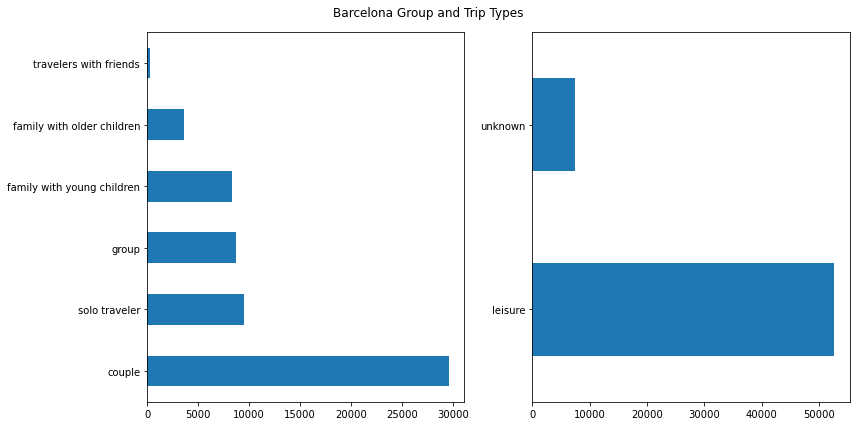

In [24]:

plt.figure(figsize=(12,6))
plt.suptitle('Barcelona Group and Trip Types')
plt.subplot(121)
barza_df.group_type.value_counts().plot.barh()

plt.subplot(122)
barza_df.trip_type.value_counts().plot.barh()

plt.tight_layout()


### Takeaways: Most guests at Barcelona hotels are couples on leisure trips

<Figure size 936x504 with 0 Axes>

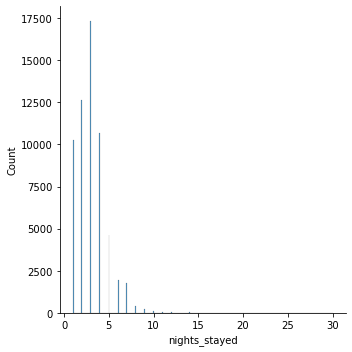

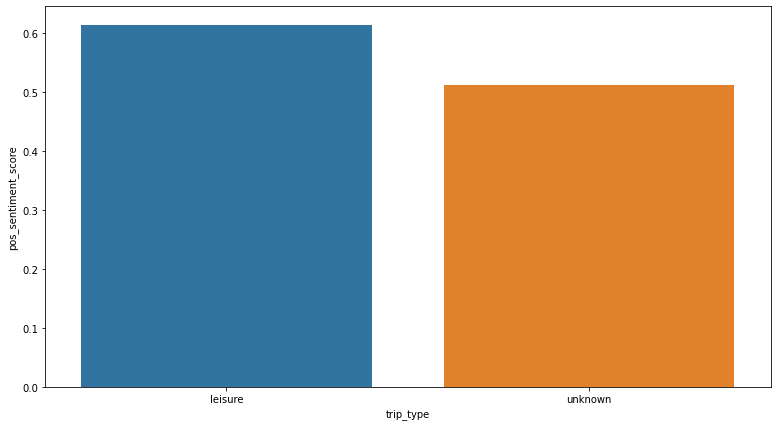

<AxesSubplot:xlabel='group_type', ylabel='pos_sentiment_score'>

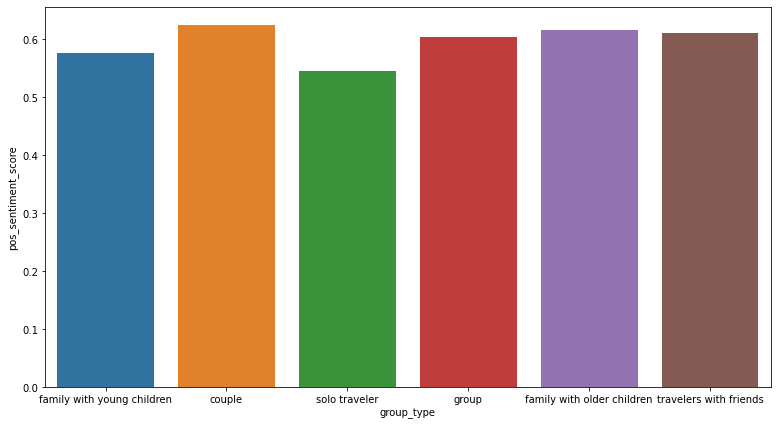

In [14]:
# Distribution of nights stayed
plt.figure(figsize=(13,7))
sns.displot(data=barza_df, x='nights_stayed')
plt.show()

#Compare trip type and positive sentiment score

plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'trip_type', y= 'pos_sentiment_score', ci=False)
plt.show()

#Compare group type and positive sentiment score
plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'group_type', y= 'pos_sentiment_score', ci= False)

### Takeaways: trends emerge with trip type and group type rel to positive sentiment score: Solo travelers, followed by families with young children show lower positive sentiment scores; and, guests on leisure trips show higher sentiment scores than those who are not on leisure trips. 

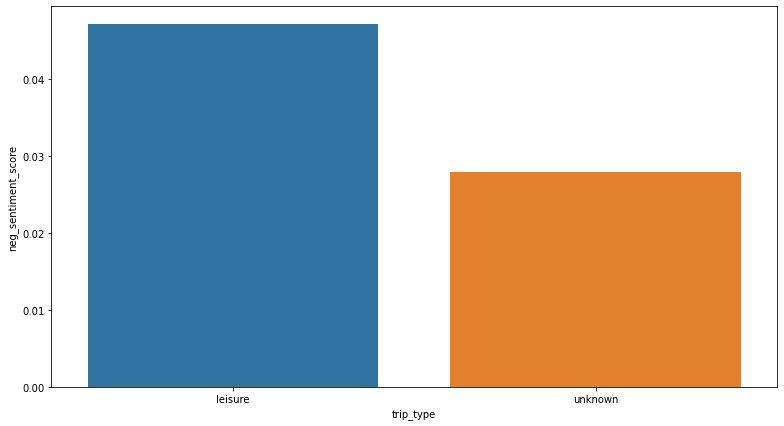

<AxesSubplot:xlabel='group_type', ylabel='neg_sentiment_score'>

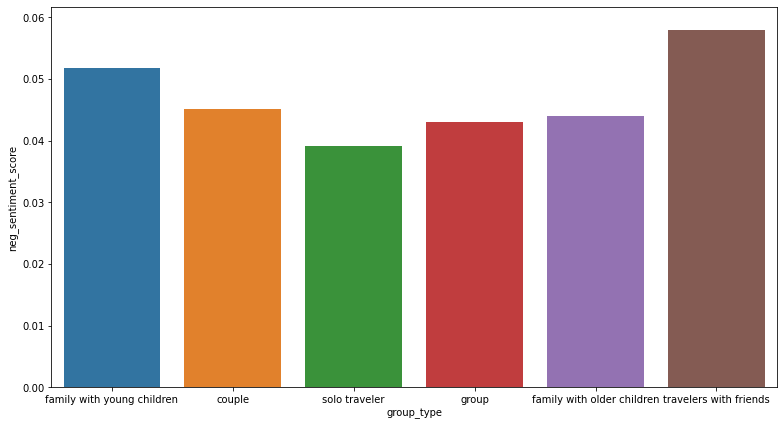

In [16]:
# Show tags (trip and group type) against negative sentiment score
plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'trip_type', y= 'neg_sentiment_score', ci=False)
plt.show()

plt.figure(figsize=(13,7))
#plt.ylim(-1,1)
sns.barplot(data=barza_df, x= 'group_type', y= 'neg_sentiment_score', ci= False)

### Takeaways: Negative sentiment scores for both trip and group type are rather neutral (sentiment scores range [-1, 1])

In [12]:
barza_df.trip_type.value_counts()

leisure    52719
unknown     7430
Name: trip_type, dtype: int64

<AxesSubplot:ylabel='hotel_name'>

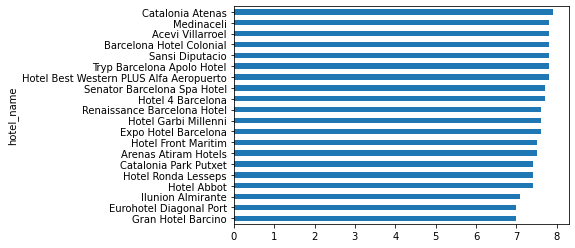

In [28]:
barza_df.groupby('hotel_name').average_score.agg('mean').sort_values().head(20).plot.barh()

In [19]:
len(barza_df.hotel_name.value_counts())

211

In [25]:
df.columns

Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

<AxesSubplot:>

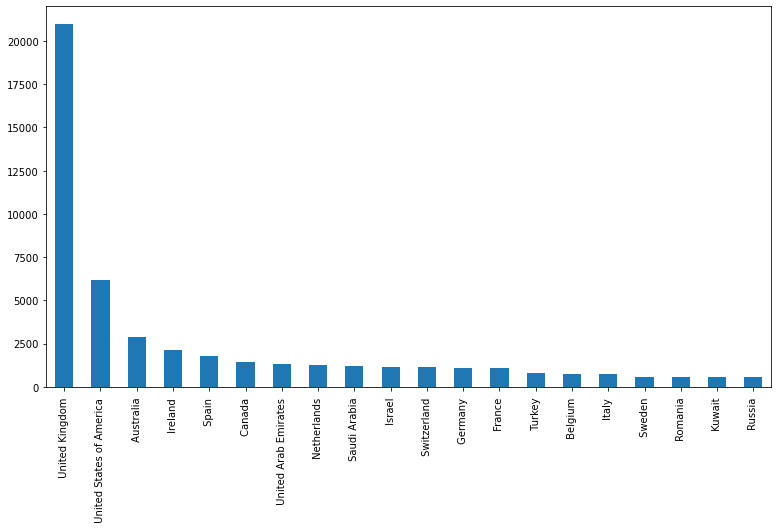

In [50]:
plt.figure(figsize=(13,7))
barza_df.reviewer_nationality.value_counts().head(20).sort_values(ascending=False).plot.bar()

### Takeaway: The vast majority of hotel guests in Barcelona are from the UK, with Americans a distant second.

$H_0:$ There is no relationship between the total number of reviews and average review score.

$H_a:$ There is a relationship between the total number of reviews and average review score.

The correlation coefficient for this test was -0.321 and its p-value is 0.000000000000.


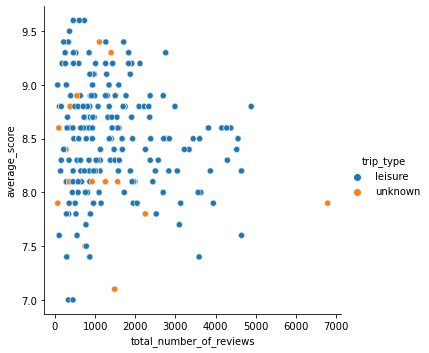

In [55]:
alpha = .05
r_coeff, pval = stats.pearsonr(x=barza_df.total_number_of_reviews, y=barza_df.average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='total_number_of_reviews', y='average_score', hue='trip_type')

### Correlation testing for a link between total number of reviews and average scores found a statistically significant, weak, negative correlation between the variables.

$H_0:$ There is no relationship between the number of nights stayed and average review score.

$H_a:$ There is a relationship between the number of nights stayed and average review score.

The correlation coefficient for this test was 0.009 and its p-value is 0.024139943762.


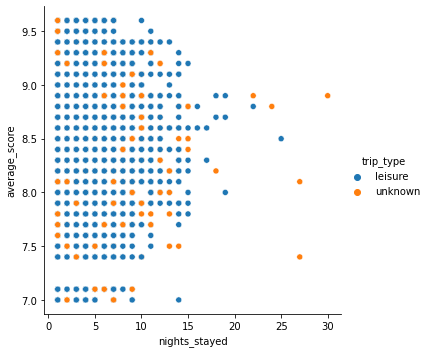

In [58]:
r_coeff, pval = stats.pearsonr(x=barza_df[barza_df.nights_stayed.notna()].nights_stayed, y=barza_df[barza_df.nights_stayed.notna()].average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='nights_stayed', y='average_score', hue='trip_type')

### There is virtually no correlation (0.009) between nights stayed and average score.